In [8]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
!pip install -U scikit-learn==1.4
from pandas.plotting import scatter_matrix


#import dataset
df = pd.read_csv("https://raw.githubusercontent.com/550tealeaves/DATA71200_sum2024_550/main/project%201/pizza_v2.csv")
print(df.head())

  company  price_cad  diameter_in      topping           variant     size  \
0       A         29         22.0      chicken  double_signature    jumbo   
1       A         25         20.0    pepperoni  double_signature    jumbo   
2       A         19         16.0    mushrooms  double_signature  regular   
3       A         22         14.0  smoked_beef  double_signature  regular   
4       A         30         18.0   mozzarella  double_signature    jumbo   

  extra_sauce extra_cheese extra_mushrooms  
0         yes          yes              no  
1         yes          yes              no  
2         yes          yes             yes  
3         yes           no             yes  
4         yes           no             yes  


# Create dummy variables

In [14]:
columns = ['company', 'topping', 'variant', 'size', 'extra_sauce', 'extra_cheese','extra_mushrooms']
df1 = pd.concat([df]+[pd.get_dummies(df[i],drop_first=True) for i in columns],axis=1)
df1.drop(columns,axis=1,inplace=True)
df1.head(3)

,price_cad,diameter_in,B,C,D,E,black_pepper,chicken,meat,mozzarella,...,super_supreme,thai_veggie,jumbo,large,medium,regular,small,yes,yes,yes
0,29,22.0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,1,0
1,25,20.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
2,19,16.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,1


In [18]:
y = df['company']
print(y)

0      A
1      A
2      A
3      A
4      A
      ..
124    E
125    E
126    E
127    E
128    E
Name: company, Length: 129, dtype: object


In [21]:
#dropped the features that are probably not relevant to the model
X = df.drop(['company'], axis=1)
print(X)

     price_cad  diameter_in      topping           variant     size  \
0           29         22.0      chicken  double_signature    jumbo   
1           25         20.0    pepperoni  double_signature    jumbo   
2           19         16.0    mushrooms  double_signature  regular   
3           22         14.0  smoked_beef  double_signature  regular   
4           30         18.0   mozzarella  double_signature    jumbo   
..         ...          ...          ...               ...      ...   
124         11          8.5         tuna        spicy tuna    small   
125         14         12.0         tuna        spicy tuna   medium   
126         17         14.0         tuna        spicy tuna    large   
127         12          8.5         meat   BBQ_meat_fiesta    small   
128         15         12.0         meat   BBQ_meat_fiesta   medium   

    extra_sauce extra_cheese extra_mushrooms  
0           yes          yes              no  
1           yes          yes              no  
2     

# Split the dataset

In [11]:
from sklearn.model_selection import train_test_split

# split data and labels into a training and a test set
#if we don't stratify, then it will randomly take classes
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [12]:
#import KNN clasifier and fit to training data
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [13]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(X_train, y_train)

ValueError: could not convert string to float: 'pepperoni'

# Inspect the Data

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   company          129 non-null    object 
 1   price_cad        129 non-null    int64  
 2   diameter_in      129 non-null    float64
 3   topping          129 non-null    object 
 4   variant          129 non-null    object 
 5   size             129 non-null    object 
 6   extra_sauce      129 non-null    object 
 7   extra_cheese     129 non-null    object 
 8   extra_mushrooms  129 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 9.2+ KB


In [24]:
#obtain summary statistics on numeric data
df.describe()

,price_cad,diameter_in
count,129.000000,129.000000
mean,15.604651,12.976744
std,3.975351,3.272674
min,10.000000,8.000000
25%,12.000000,12.000000
50%,15.000000,12.000000
75%,17.000000,14.000000
max,30.000000,22.000000


## Global check of dataset for any missing values

In [56]:
df.isnull().values.any()

False

# Histogram plot shows data is slightly right skewed

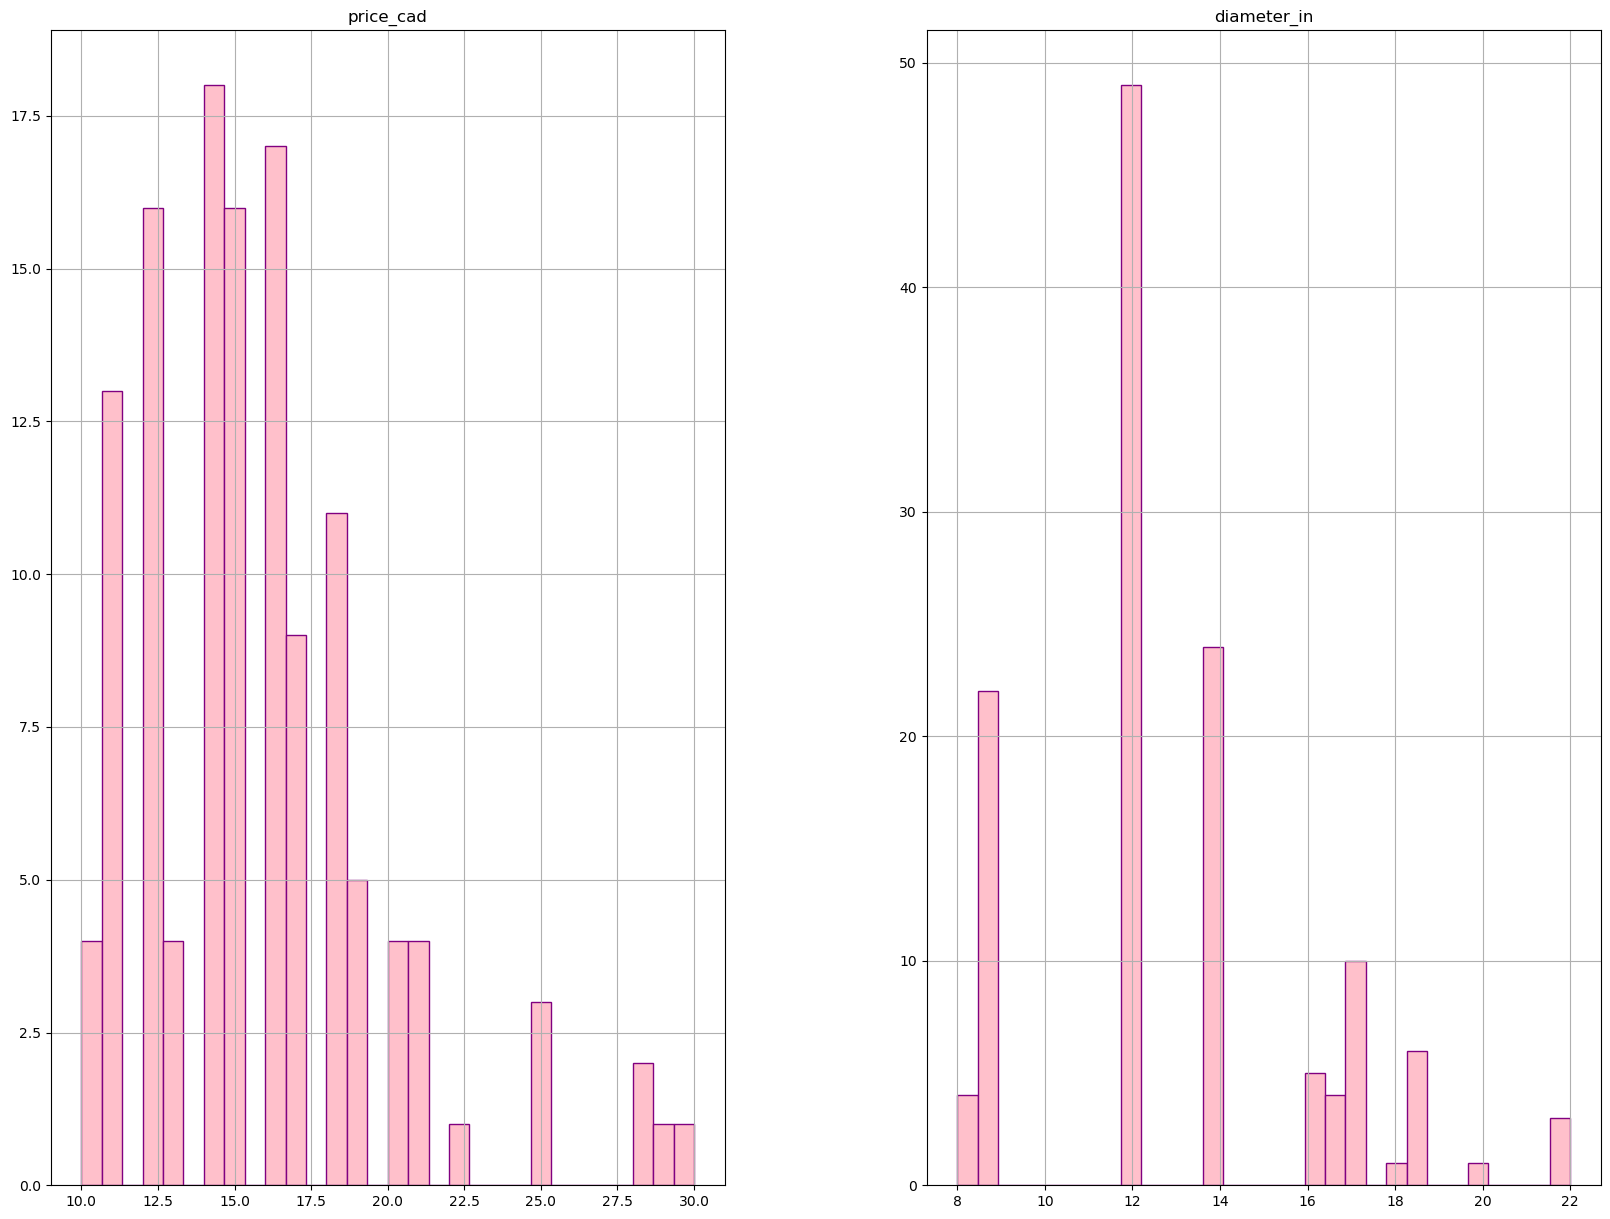

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=30, figsize=(20,15), color='pink', ec='purple') #changed fill and edge color
plt.show()

# Scatterplot suggests that diameter and price are directly proportional 

<AxesSubplot:xlabel='price_cad', ylabel='diameter_in'>

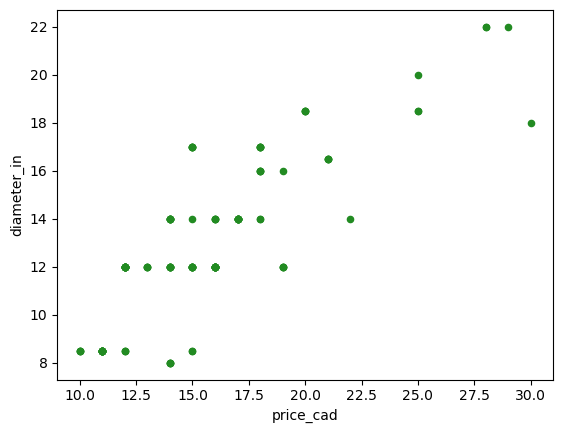

In [27]:
df.plot(kind="scatter", x="price_cad", y="diameter_in", color="forestgreen")

<AxesSubplot:xlabel='price_cad', ylabel='diameter_in'>

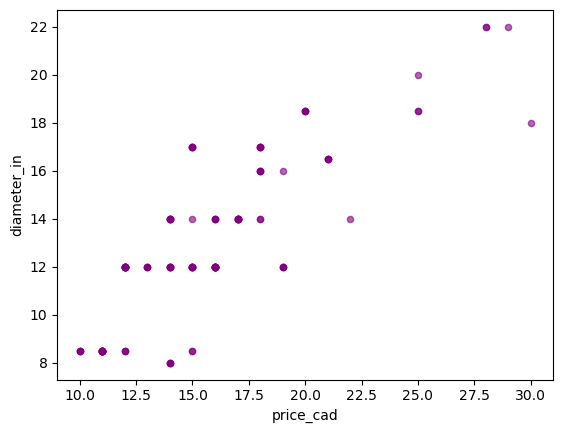

In [28]:
df.plot(kind="scatter", x="price_cad", y="diameter_in", alpha=0.6, color='purple')

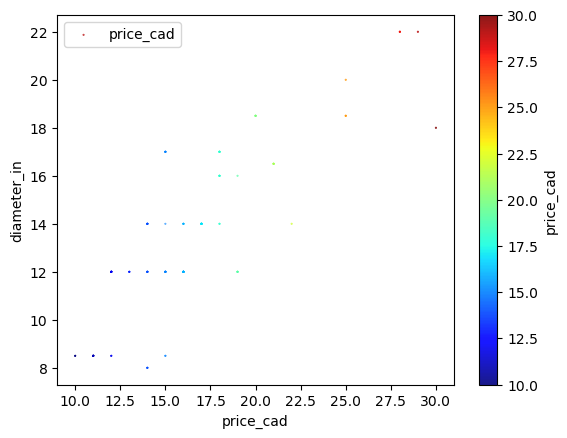

In [29]:
df.plot(kind="scatter", x="price_cad", y="diameter_in", alpha=0.9,
         s=df["price_cad"]/100, label="price_cad",
         c="price_cad", cmap=plt.get_cmap("jet"), colorbar=True,
     )
plt.legend()

array([[<AxesSubplot:xlabel='price_cad', ylabel='price_cad'>,
        <AxesSubplot:xlabel='diameter_in', ylabel='price_cad'>],
       [<AxesSubplot:xlabel='price_cad', ylabel='diameter_in'>,
        <AxesSubplot:xlabel='diameter_in', ylabel='diameter_in'>]],
      dtype=object)

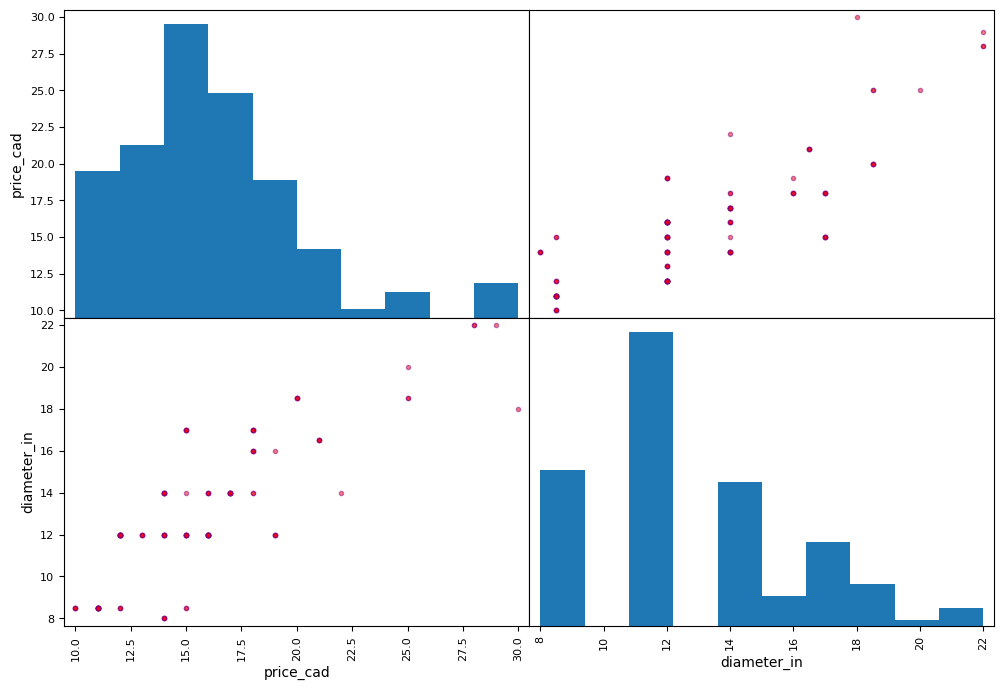

In [30]:
#Can see effects of the data skewed
from pandas.plotting import scatter_matrix

attributes = ["price_cad", "diameter_in"] #will plot these 4 col of data
scatter_matrix(df[attributes], figsize=(12, 8), color='red', ec='purple')

# Correlation matrix shows strong positive correlation between diameter and price 

In [31]:
corr_matrix = df[attributes].corr()
corr_matrix['price_cad'].sort_values(ascending=False)

price_cad      1.000000
diameter_in    0.814464
Name: price_cad, dtype: float64

In [32]:
from sklearn.preprocessing import OrdinalEncoder # just to raise an ImportError if Scikit-Learn < 0.20
from sklearn.preprocessing import OneHotEncoder

df_cat = df['price_cad'].values.reshape(-1,1)



cat_encoder = OneHotEncoder()
df_cat_1hot = cat_encoder.fit_transform(df_cat)
df_cat_1hot

<129x17 sparse matrix of type '<class 'numpy.float64'>'
	with 129 stored elements in Compressed Sparse Row format>

In [33]:
df_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Binning

In [37]:
from sklearn.preprocessing import KBinsDiscretizer
kb = KBinsDiscretizer(n_bins=10, strategy='uniform', subsample=None)
kb.fit(df['price_cad'].values.reshape(-1, 1))
print("bin edges: \n", kb.bin_edges_)

bin edges: 
 [array([10., 12., 14., 16., 18., 20., 22., 24., 26., 28., 30.])]


In [38]:
binned = kb.transform(df['price_cad'].values.reshape(-1, 1))
binned

<129x10 sparse matrix of type '<class 'numpy.float64'>'
	with 129 stored elements in Compressed Sparse Row format>

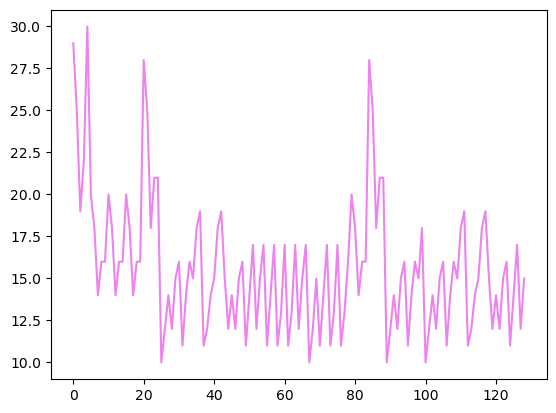

In [39]:
#Create plot of bins
plt.plot(df['price_cad'].values.reshape(-1, 1), color='violet')
plt.show()

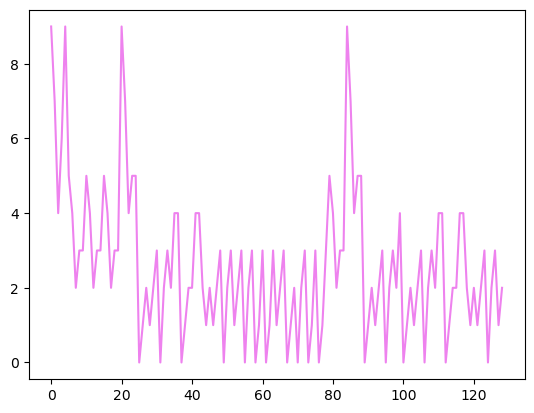

In [40]:
plt.plot(binned.argmax(1), color='violet')
plt.show()

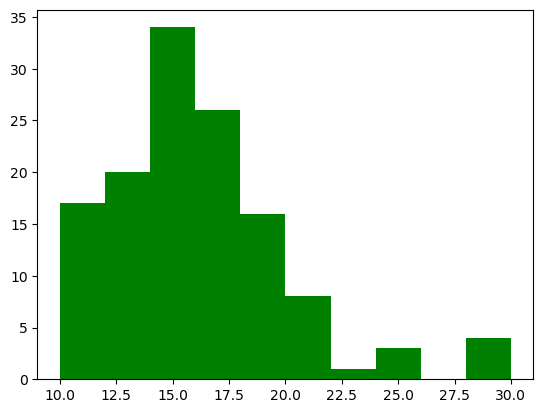

In [41]:
#Create histogram of price with 10 bins
plt.hist(df['price_cad'].values.reshape(-1, 1), bins=10, color='green')
plt.show()

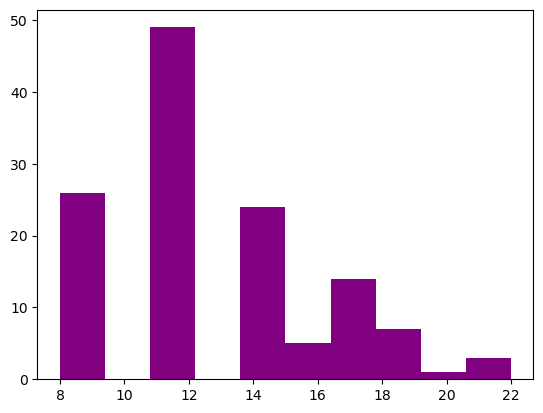

In [42]:
#Create histogram of diameter with 10 bins
plt.hist(df['diameter_in'].values.reshape(-1, 1), bins=10, color='purple')
plt.show()

# Transformations

Will apply the below transformations for price_cad & diameter_in

1. Squaring
2. Cubing
3. np.log
4. np.exp

### ORIGINAL - price_cad

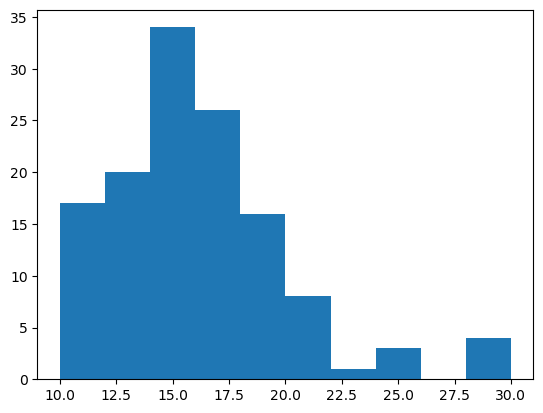

In [43]:
plt.hist(df['price_cad'].values.reshape(-1, 1))
plt.show()

### SQUARED - price_cad

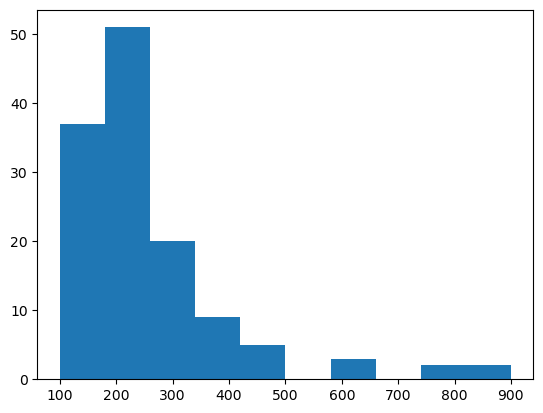

In [44]:
plt.hist(df['price_cad'].values.reshape(-1, 1)**2, bins=10)
plt.show()

### CUBED - price_cad

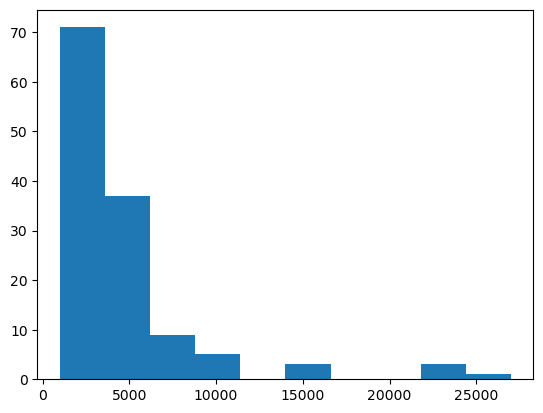

In [45]:
plt.hist(df['price_cad'].values.reshape(-1, 1)**3, bins=10)
plt.show()

### NP.LOG - price_cad

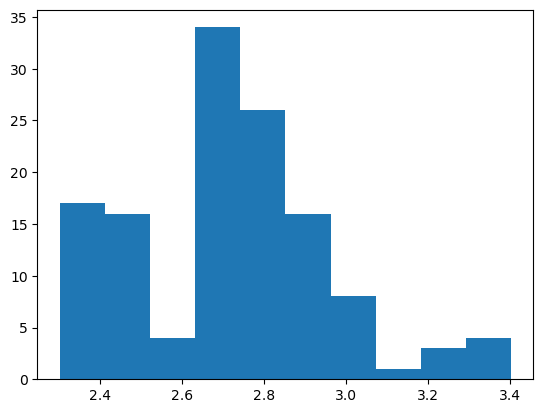

In [46]:
plt.hist(np.log(df['price_cad'].values.reshape(-1, 1)), bins=10)
plt.show()

### NP.EXP - price_cad

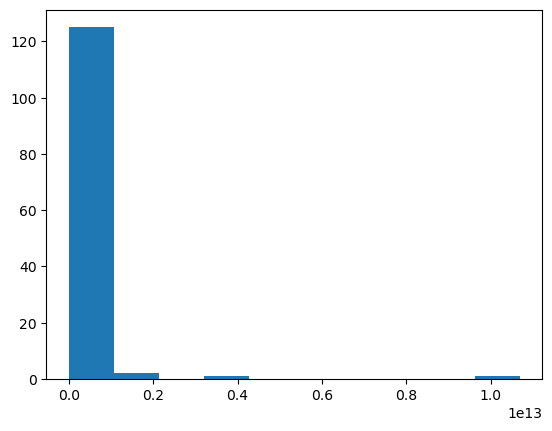

In [47]:
plt.hist(np.exp(df['price_cad'].values.reshape(-1, 1)), bins=10)
plt.show()

# Transformation for diameter_in - rerun the same ones as above

### ORIGINAL - diameter_in

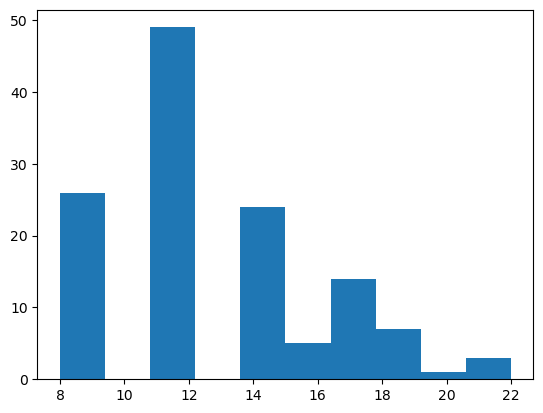

In [48]:
plt.hist(df['diameter_in'].values.reshape(-1, 1))
plt.show()

### SQUARED - diameter_in

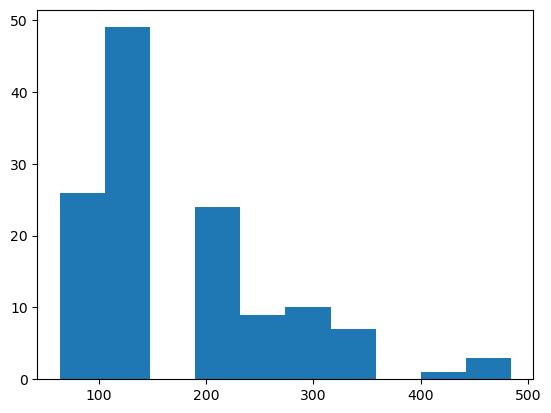

In [49]:
plt.hist(df['diameter_in'].values.reshape(-1, 1)**2, bins=10)
plt.show()

### CUBED - diameter_in

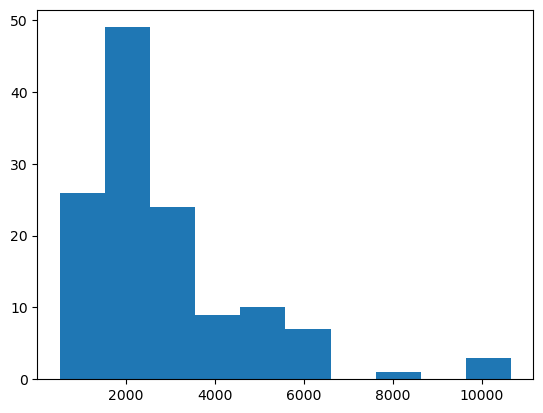

In [50]:
plt.hist(df['diameter_in'].values.reshape(-1, 1)**3, bins=10)
plt.show()

### NP.LOG - diameter_in

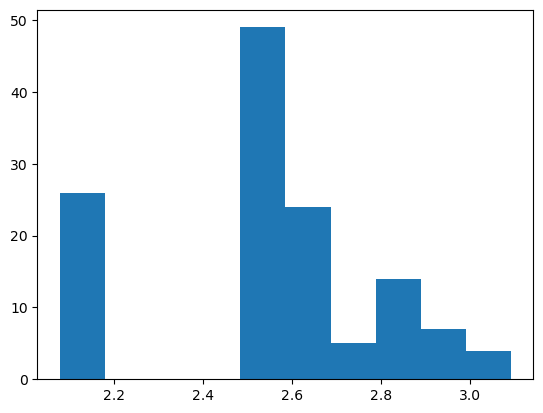

In [51]:
plt.hist(np.log(df['diameter_in'].values.reshape(-1, 1)), bins=10)
plt.show()

### NP.EXP - diameter_in

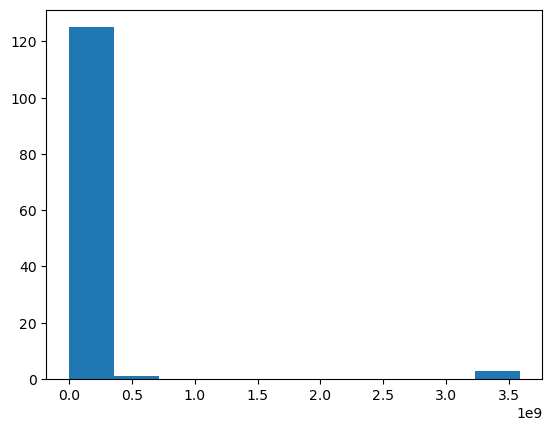

In [52]:
plt.hist(np.exp(df['diameter_in'].values.reshape(-1, 1)), bins=10)
plt.show()

## Transformation scatter matrices

array([[<AxesSubplot:xlabel='price_cad', ylabel='price_cad'>,
        <AxesSubplot:xlabel='diameter_in', ylabel='price_cad'>],
       [<AxesSubplot:xlabel='price_cad', ylabel='diameter_in'>,
        <AxesSubplot:xlabel='diameter_in', ylabel='diameter_in'>]],
      dtype=object)

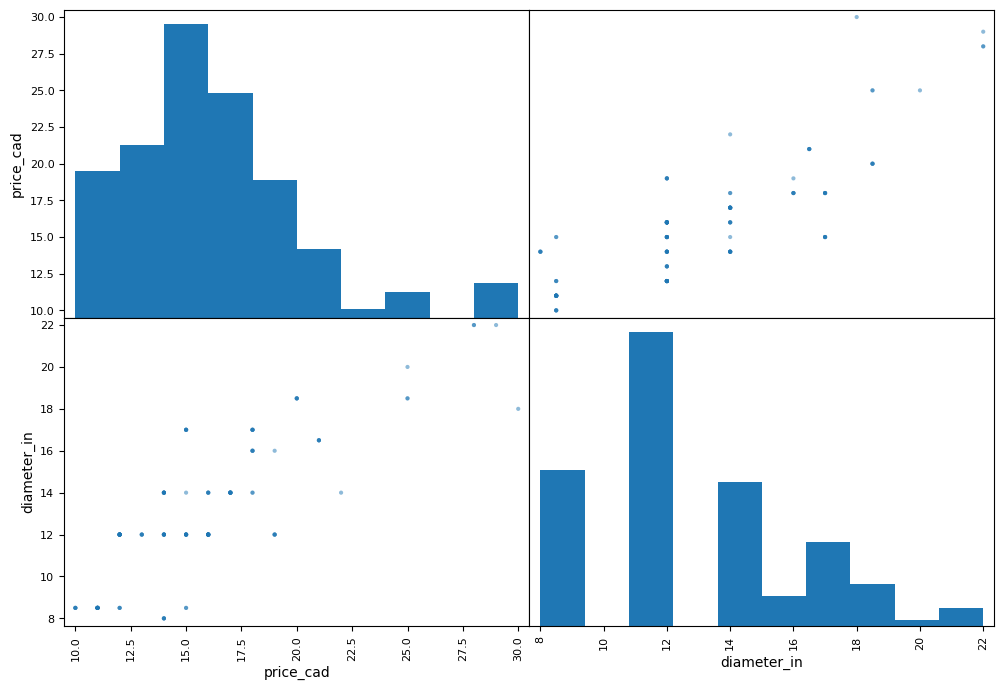

In [53]:
#Original scatter matrix for price_cad and diameter_in

attributes = ["price_cad", "diameter_in"]
scatter_matrix(df[attributes], figsize=(12, 8))

## Squared scattered matrices

array([[<AxesSubplot:xlabel='price_cad', ylabel='price_cad'>,
        <AxesSubplot:xlabel='diameter_in', ylabel='price_cad'>],
       [<AxesSubplot:xlabel='price_cad', ylabel='diameter_in'>,
        <AxesSubplot:xlabel='diameter_in', ylabel='diameter_in'>]],
      dtype=object)

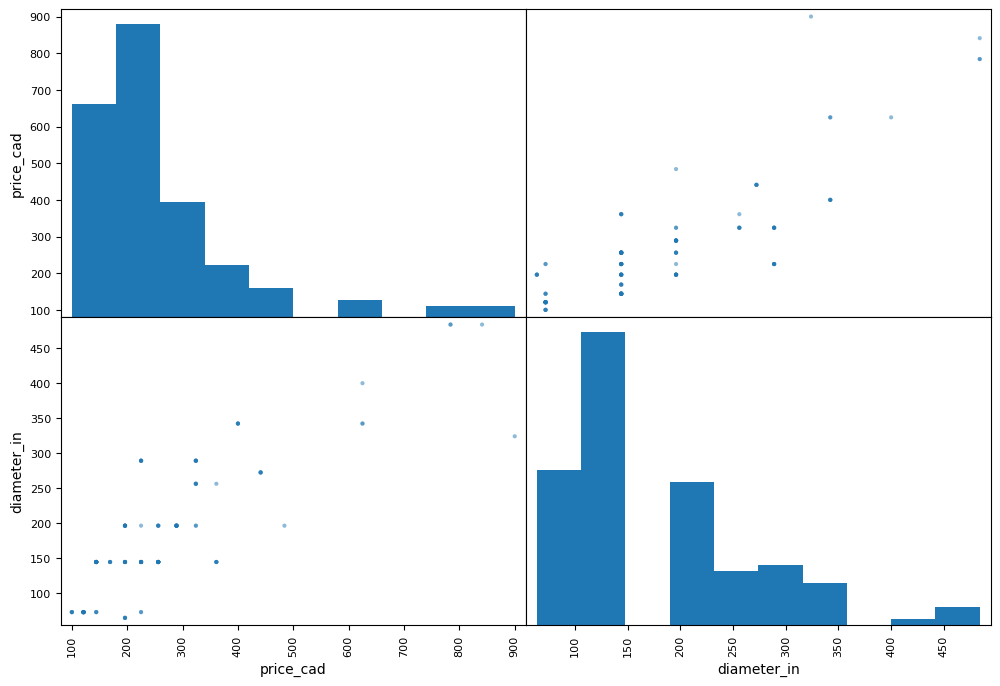

In [54]:
scatter_matrix(df[attributes]**2, figsize=(12, 8))

### CUBED scattered matrices

array([[<AxesSubplot:xlabel='price_cad', ylabel='price_cad'>,
        <AxesSubplot:xlabel='diameter_in', ylabel='price_cad'>],
       [<AxesSubplot:xlabel='price_cad', ylabel='diameter_in'>,
        <AxesSubplot:xlabel='diameter_in', ylabel='diameter_in'>]],
      dtype=object)

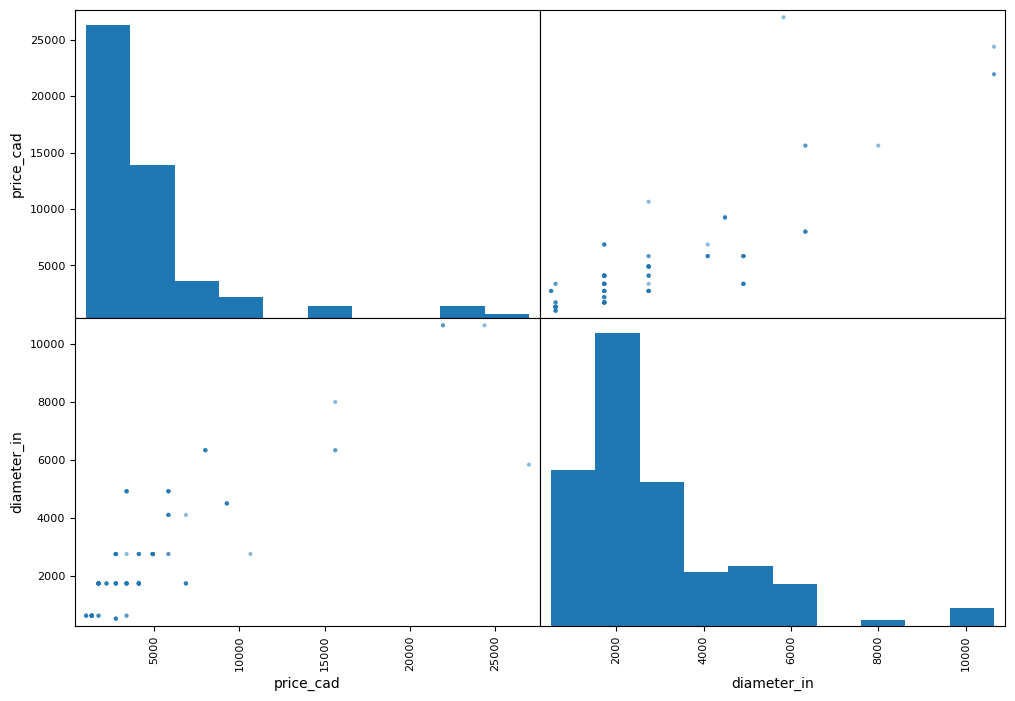

In [55]:
scatter_matrix(df[attributes]**3, figsize=(12, 8))